<a href="https://colab.research.google.com/github/mldurga/easydl/blob/master/EDA_Blrs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install fastai -Uqq
from fastai.tabular.all import *
import seaborn as sns

     |████████████████████████████████| 189 kB 5.0 MB/s 
     |████████████████████████████████| 56 kB 4.7 MB/s 


# Exploratory Data Analysis of Boilers of TPP

It is a basic and preliminary attempt to apply data science techniques to the huge data generated on our equipment, inorder to leverage the systemic inefficiencies. It is also to be noted that, much better utilisation of these techniques is possible and can increase the bottom line if applied with the higher collaboration of our internal resources and people.

## Boilers:

### Finding best combination of mills to run

Averaging over the months data and plotting them over period of time wrt to Main steam flow showed that certain mills combinations were more steam generating combinations than the others. This is not to project any efficiency calculations, but those cobinations can be exploited for better steam generation.

### Boiler 1
After extracting and cleaning the data, final data frame can be observed as follows: Date range is from july 15th 2021 to August 14th 2021

The below data is freed from all the BAD data, and column names can be interpreted as names are familarised for the target group.  

In [4]:
fp=Path('/content/plant_data_july_aug_21/blr1')
blr1_files=get_files(fp,extensions='.csv')
fr=[pd.read_csv(x, parse_dates=True) for x in blr1_files]
blr1=pd.concat(fr)
blr1['DateTime']=pd.to_datetime(blr1['Date/Time'], format="%d/%m/%Y %H:%M:%S.%f")
blr1.sort_values(by='DateTime', inplace=True)
blr1.drop('Date/Time', axis=1, inplace=True)
blr1.set_index('DateTime', inplace=True)
columns=['MS_pres', 'FW_temp', 'COG_fl','PA_Hdr','MS_flow','MILL_B','MILL_A','BFG_fl','MILL_D','O2','MILL_C','MS_Temp']
blr1.columns=columns
BLR1=blr1.replace({' Bad Data': np.nan})
BLR1=BLR1.apply(pd.to_numeric)
BLR1.dropna(inplace=True)
BLR1['MILL_comb']=BLR1['MILL_A'].apply(lambda x: "A" if x>8 else "")+BLR1['MILL_B'].apply(lambda x: "B" if x>8 else "")+BLR1['MILL_C'].apply(lambda x: "C" if x>8 else "")+BLR1['MILL_D'].apply(lambda x: "D" if x>8 else "")
BLR1=BLR1.round(1)
BLR1.head()

,MS_pres,FW_temp,COG_fl,PA_Hdr,MS_flow,MILL_B,MILL_A,BFG_fl,MILL_D,O2,MILL_C,MS_Temp,MILL_comb
DateTime,,,,,,,,,,,,,
2021-07-15 06:01:00,96.8,143.5,8.8,989.6,257.3,17.4,6.7,57.6,13.1,0.1,14.0,539.5,BCD
2021-07-15 06:02:00,97.9,143.5,8.8,989.6,257.3,17.4,6.7,57.6,13.1,0.1,14.0,539.5,BCD
2021-07-15 06:03:00,99.0,143.5,8.8,989.6,257.3,17.4,6.7,57.6,13.1,0.1,14.0,539.5,BCD
2021-07-15 06:04:00,100.1,143.5,8.8,989.6,259.9,17.4,6.7,57.6,13.1,0.1,14.0,539.5,BCD
2021-07-15 06:05:00,100.1,143.5,8.8,989.6,265.1,17.4,6.7,57.6,13.1,0.1,14.0,539.5,BCD


Following are the all combination of mills that were run during the selected time period

In [5]:
BLR1['MILL_comb'].unique()

array(['BCD', 'BC', 'CD', 'ABCD', 'ACD', 'ABD', 'AD', 'AB', 'ABC', 'BD',
       'B', 'A', 'D'], dtype=object)

Following is the plot between Main steam flow and combination of mills, irrespective of the other fuel combinations

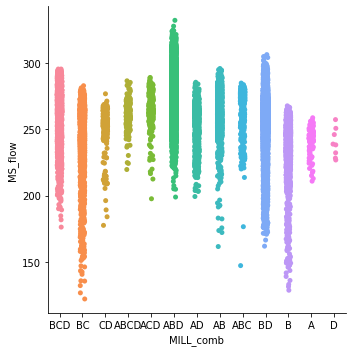

In [6]:
sns.catplot(x='MILL_comb',y='MS_flow', data=BLR1)

Combining BFG data with mills combinations we can better understand the impact of mills combination in relation to the main steam flow

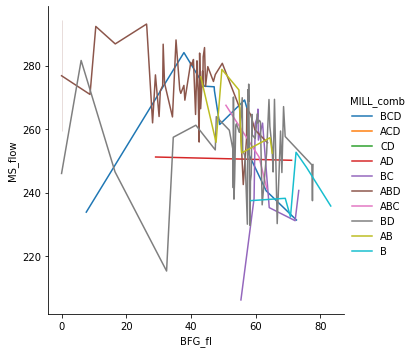

In [7]:
def resampl(x,BLR1):
    new_df=BLR1.resample(x).mean()
    new_df['MILL_comb']=new_df['MILL_A'].apply(lambda x: "A" if x>8 else "")+new_df['MILL_B'].apply(lambda x: "B" if x>8 else "")+new_df['MILL_C'].apply(lambda x: "C" if x>8 else "")+new_df['MILL_D'].apply(lambda x: "D" if x>8 else "")
    return new_df
BLR5H=resampl('5H',BLR1)
sns.relplot(x='BFG_fl',y="MS_flow", kind='line',ci='sd',hue='MILL_comb', data=BLR5H)

From the data it seems that best mill combination is MIlls 'ABD'. Brown line showing the flow BFG ranges from 20 to 40 with mills ABD combination is giving best steam flow. Being working in MCR, I can concur the idea that BFG in the range of 40 generally giving good steam flow, though I am not aware that combines with mills ABD gives best flow.

Ofcourse there are many other things to consider like O2,Feed water temp, coal quality. As it is a basic attempt, objective of this report is to introduce the techniques to leverage and analyse possible impact on our plant efficiency.

Applying same techniques for all remaining boilers:

### Boiler 2

In [8]:
fp=Path('/content/plant_data_july_aug_21/blr2')
blr2_files=get_files(fp,extensions='.csv')
fr=[pd.read_csv(x, parse_dates=True) for x in blr2_files]
blr2=pd.concat(fr)
blr2['DateTime']=pd.to_datetime(blr2['Date/Time'], format="%d/%m/%Y %H:%M:%S.%f")
blr2.sort_values(by='DateTime', inplace=True)
blr2.drop('Date/Time', axis=1, inplace=True)
blr2.set_index('DateTime', inplace=True)
blr2.head()
columns=['MS_pres', 'MS_temp','MILL_B','MILL_C','MS_flow','MILL_D','MILL_E','FW_temp','COG_fl','BFG_fl','PA_Hdr','O2']
blr2.columns=columns
BLR2=blr2.replace({' Bad Data': np.nan})
BLR2=BLR2.apply(pd.to_numeric)
BLR2.dropna(inplace=True)
BLR2['MILL_comb']=BLR2['MILL_B'].apply(lambda x: "B" if x>8 else "")+BLR2['MILL_C'].apply(lambda x: "C" if x>8 else "")+BLR2['MILL_D'].apply(lambda x: "D" if x>8 else "")+BLR2['MILL_E'].apply(lambda x: "E" if x>8 else "")
BLR2=BLR2.round(1)
BLR2.head()

,MS_pres,MS_temp,MILL_B,MILL_C,MS_flow,MILL_D,MILL_E,FW_temp,COG_fl,BFG_fl,PA_Hdr,O2,MILL_comb
DateTime,,,,,,,,,,,,,
2021-07-15 06:01:00,100.7,548.4,12.2,7.2,223.1,14.0,15.2,143.2,8.8,29.9,988.6,0.5,BDE
2021-07-15 06:02:00,100.7,547.4,12.2,7.2,228.0,14.0,15.2,143.2,8.8,29.9,988.6,0.5,BDE
2021-07-15 06:03:00,100.7,547.4,12.4,7.2,232.3,14.0,15.2,143.2,8.8,29.9,988.6,0.5,BDE
2021-07-15 06:04:00,100.7,546.4,12.4,7.2,232.3,14.0,15.2,143.2,8.8,29.9,988.6,0.5,BDE
2021-07-15 06:05:00,100.7,544.0,12.4,7.2,228.6,14.0,15.2,143.2,8.8,29.9,988.6,0.5,BDE


In [9]:
BLR2['MILL_comb'].unique()

array(['BDE', 'BCDE', 'CDE', 'DE', 'BD', 'D', 'BCD', 'CD', 'CE', 'C', 'E',
       '', 'BE', 'BCE', 'BC', 'B'], dtype=object)

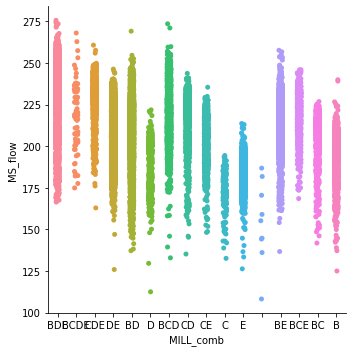

In [10]:
sns.catplot(x='MILL_comb',y='MS_flow', data=BLR2)

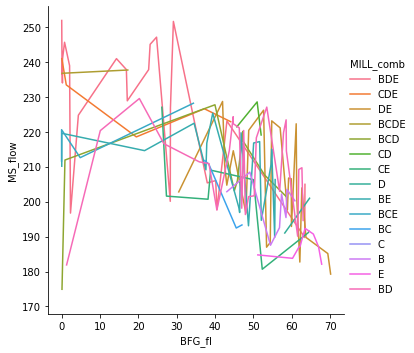

In [11]:
def resampl(x,BLR2):
    new_df=BLR2.resample(x).mean()
    new_df['MILL_comb']=new_df['MILL_B'].apply(lambda x: "B" if x>8 else "")+new_df['MILL_C'].apply(lambda x: "C" if x>8 else "")+new_df['MILL_D'].apply(lambda x: "D" if x>8 else "")+new_df['MILL_E'].apply(lambda x: "E" if x>8 else "")
    return new_df
BLR2_5H=resampl('5H',BLR2)
sns.relplot(x='BFG_fl',y="MS_flow", kind='line',ci='sd',hue='MILL_comb', data=BLR2_5H)

from the observations BDE is outperforming both mills combinations data and in combination with BFG

### Boiler 4

In [12]:
fp=Path('/content/plant_data_july_aug_21/blr4')
blr4_files=get_files(fp,extensions='.csv')
fr=[pd.read_csv(x, parse_dates=True) for x in blr4_files]
blr4=pd.concat(fr)
blr4['DateTime']=pd.to_datetime(blr4['Date/Time'], format="%d/%m/%Y %H:%M:%S.%f")
blr4.sort_values(by='DateTime', inplace=True)
blr4.drop('Date/Time', axis=1, inplace=True)
blr4.set_index('DateTime', inplace=True)
columns=['PA_Hdr','MS_temp','MILL_E','FW_temp','MS_flow','MS_pres', 'MILL_D','O2','MILL_B','MILL_A','BFG_fl','COG_fl']
blr4.columns=columns
BLR4=blr4.replace({' Bad Data': np.nan})
BLR4=BLR4.apply(pd.to_numeric)
BLR4.dropna(inplace=True)
BLR4['MILL_comb']=BLR4['MILL_B'].apply(lambda x: "B" if x>8 else "")+BLR4['MILL_A'].apply(lambda x: "A" if x>8 else "")+BLR4['MILL_D'].apply(lambda x: "D" if x>8 else "")+BLR4['MILL_E'].apply(lambda x: "E" if x>8 else "")
BLR4=BLR4.round(1)
BLR4.head()

,PA_Hdr,MS_temp,MILL_E,FW_temp,MS_flow,MS_pres,MILL_D,O2,MILL_B,MILL_A,BFG_fl,COG_fl,MILL_comb
DateTime,,,,,,,,,,,,,
2021-07-15 06:01:00,885.6,547.0,17.4,144.3,214.9,92.7,0.6,1.1,0.3,14.7,64.9,17.6,AE
2021-07-15 06:02:00,885.5,547.0,17.4,144.3,214.9,93.7,0.6,1.1,0.3,14.7,63.8,17.6,AE
2021-07-15 06:03:00,887.1,547.0,17.4,144.3,214.9,94.8,0.6,1.1,0.3,14.8,65.7,17.6,AE
2021-07-15 06:04:00,886.0,547.0,17.4,144.3,210.8,96.0,0.6,0.1,0.3,13.8,66.8,17.6,AE
2021-07-15 06:05:00,884.3,547.0,16.3,144.3,209.8,97.1,0.6,0.1,0.3,13.8,65.8,16.4,AE


In [13]:
BLR4['MILL_comb'].unique()

array(['AE', 'A', 'BA', 'BAE', 'BE', 'E', 'ADE', 'DE', 'AD', 'BADE'],
      dtype=object)

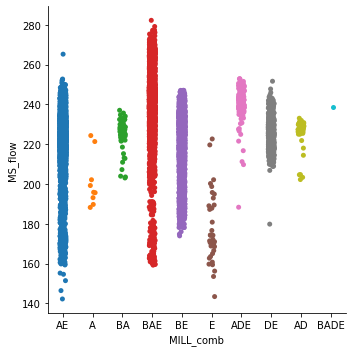

In [14]:
sns.catplot(x='MILL_comb',y='MS_flow', data=BLR4)

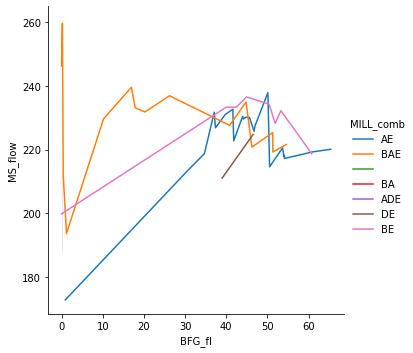

In [15]:
def resampl(x,BLR4):
    new_df=BLR4.resample(x).mean()
    new_df['MILL_comb']=new_df['MILL_B'].apply(lambda x: "B" if x>8 else "")+new_df['MILL_A'].apply(lambda x: "A" if x>8 else "")+new_df['MILL_D'].apply(lambda x: "D" if x>8 else "")+new_df['MILL_E'].apply(lambda x: "E" if x>8 else "")
    return new_df
BLR4_5H=resampl('5H',BLR4)
sns.relplot(x='BFG_fl',y="MS_flow", kind='line',ci='sd',hue='MILL_comb', data=BLR4_5H)

While BAE performed much wider range of BFG flow, AE is giving good results in the range of 40 to 60 BFG flow

### Boiler 5

Data for Boiler 5 is less compared to other boilers due to unavialability of data. However, worked on data was sufficient to show the results are in concurrence with the general observations of MCR personnel.

In [16]:
fp=Path('/content/plant_data_july_aug_21/blr5')
blr5_files=get_files(fp,extensions='.csv')
fr=[pd.read_csv(x, parse_dates=True) for x in blr5_files]
blr5=pd.concat(fr)
blr5['DateTime']=pd.to_datetime(blr5['Date/Time'], format="%d/%m/%Y %H:%M:%S.%f")
blr5.sort_values(by='DateTime', inplace=True)
blr5.drop('Date/Time', axis=1, inplace=True)
blr5.set_index('DateTime', inplace=True)
columns=['MILL_C','MS_temp','MILL_D','O2','MS_flow','FW_temp','MILL_E','BFG_fl','MS_pres','COG_fl', 'MILL_A','MILL_B']
blr5.columns=columns
BLR5=blr5.replace({' Bad Data': np.nan})
BLR5=BLR5.apply(pd.to_numeric)
BLR5.dropna(inplace=True)
BLR5['MILL_comb']=BLR5['MILL_B'].apply(lambda x: "B" if x>8 else "")+BLR5['MILL_A'].apply(lambda x: "A" if x>8 else "")+BLR5['MILL_C'].apply(lambda x: "C" if x>8 else "")+BLR5['MILL_D'].apply(lambda x: "D" if x>8 else "")+BLR5['MILL_E'].apply(lambda x: "E" if x>8 else "")
BLR5=BLR5.round(1)
BLR5.head()

,MILL_C,MS_temp,MILL_D,O2,MS_flow,FW_temp,MILL_E,BFG_fl,MS_pres,COG_fl,MILL_A,MILL_B,MILL_comb
DateTime,,,,,,,,,,,,,
2021-09-03 17:30:00,11.8,529.6,13.9,2.3,293.7,169.5,0.4,30.7,97.0,14.8,7.2,12.5,BCD
2021-09-03 17:31:00,11.6,529.6,13.9,2.3,295.1,169.5,0.4,30.7,97.0,14.8,7.2,12.5,BCD
2021-09-03 17:32:00,12.0,528.6,13.9,2.3,295.1,169.5,0.4,30.7,97.0,14.8,7.2,12.5,BCD
2021-09-03 17:33:00,12.8,528.6,13.9,2.3,295.1,169.5,0.4,30.7,97.0,14.8,7.2,12.5,BCD
2021-09-03 17:34:00,12.6,528.6,13.9,2.3,295.1,169.5,0.4,30.7,96.0,14.8,7.2,12.5,BCD


In [17]:
# BLR5['MILL_comb'].unique()
def more2(x):
    if len(x)>2:
        return x
    else:
        return ""
BLR5['MILL_comb']=BLR5['MILL_comb'].apply(more2)

single and 2 mill combinations were removed to get the data for 3 and 4 mill combinataions. Blr 5 has more possible combinations with little difference in steam flows

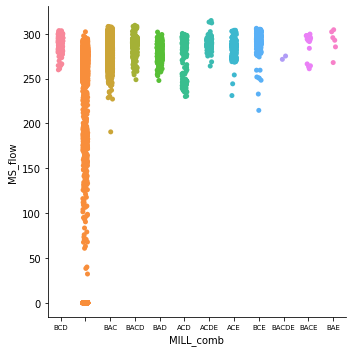

In [18]:
plt.rcParams["figure.figsize"] = (8, 4)
plt.rcParams["xtick.labelsize"] = 7
p=sns.catplot(x='MILL_comb',y='MS_flow',data=BLR5,legend_out=True) 


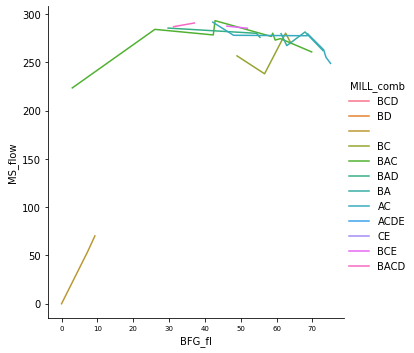

In [19]:
def resampl(x,BLR5):
    new_df=BLR5.resample(x).mean()
    new_df['MILL_comb']=new_df['MILL_B'].apply(lambda x: "B" if x>8 else "")+new_df['MILL_A'].apply(lambda x: "A" if x>8 else "")+new_df['MILL_C'].apply(lambda x: "C" if x>8 else "")+new_df['MILL_D'].apply(lambda x: "D" if x>8 else "")+new_df['MILL_E'].apply(lambda x: "E" if x>8 else "")
    return new_df
BLR5_5H=resampl('5H',BLR5)
sns.relplot(x='BFG_fl',y="MS_flow", kind='line',ci='sd',hue='MILL_comb', data=BLR5_5H)

except BC, many of the combination of mills are go well with BFG combinations. 

## Final Notes:

All the data worked on here, were collected from MCR log books. More collobaration and technical guidance can leverage the data much more profitable way. Some of the ideas that I am focussing for the future work are as follows:
* Creating a Machine Learning model which can predict Mill currents thus feeder speeds, for a given demand of BFG consumption and given steam flow
* Comparative analysis of boiler 2 and boiler 4 metal temperatures with the boiler 1 and boiler 5 metal temperatures to understand and suggest better combination of fuel to get better steam flow/kg of fuel
* Managing maintenance schedules based on workng hours of mills rather than fixed time schedules, thus increasing mills availability and decreasing maintenance costs
* Finding power generation MW/ton of steam flow for each turbine, thus distributing the load accordingly in current times due to low generation, thus saving fuel
* create Machine Learning model on SCADA data to predict the power import per day
* I am open for any other assignment for the requirement of the plant




I thank you all my superiors for the support.

Thanking you

Durga Kumar D
